# Striatum example network

This notebook creates the striatum scaffold model. Since the CPU resources on EBRAINS are limited, we run a small subset of the full network. If you have access to a powerful desktop you can increase the ```number_of_neurons``` below to run a larger network.

Networks of at least 150 neurons will contain dSPN (47.5%), iSPN (47.5%), FS (1.3%), LTS (0.7%) and ChIN (1.1%). If you run a smaller network not all neuron types might be represented.

The volume of the network is scaled to maintain 80500 neurons per mm3. The connection probability between pairs of neurons matches experimental data.

![striatum](striatum-fig.svg)

In [1]:
number_of_neurons = 50

%matplotlib inline

## Start ipcluster

For larger networks it can be helpful to run the network creation code in parallel. You can start the ipyparallel workers using ```start_ipcluster.sh``` located in the ```examples/notebook``` directory. After starting ipcluster give it a few seconds to startup before proceeding with the rest of the commands in this notebook. To stop the cluster use ```ipcluster stop```.

For instructions how to install and activate ipyparallel for your notebook see 
https://github.com/ipython/ipyparallel

## Check if ipyparallel is running.

In [2]:
import os
from ipyparallel import Client
import snudda

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(".ipython", "profile_default", "security", "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

# Check if the user has the updated BasalGangliaData installed, if not use the old data provided
bg_path = "../../../BasalGangliaData/data/"
if os.path.isdir(bg_path):
    snudda_data = bg_path
else:
    snudda_data = os.path.join(os.path.dirname(snudda.__file__), "data")


Warning, running in serial.


## Define the striatal network

Create the ```network-config.json``` file

In [3]:
import os

network_path = os.path.join("networks/striatum_example")

from snudda import SnuddaInit
struct_def = {"Striatum": number_of_neurons }

si = SnuddaInit(network_path=network_path, struct_def=struct_def, random_seed=123, snudda_data=snudda_data)

Adding Striatum with 50 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/chin
Writing networks/striatum_example/network-config.json


## Place the neurons in the volume

In [4]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/striatum_example/network-config.json


## Touch detection

In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/striatum_example/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 25/100 (50 neurons)
Processing hyper voxel : 5/100 (50 neurons)
Processing hyper voxel : 21/100 (48 neurons)
Processing hyper voxel : 24/100 (41 neurons)
Processing hyper voxel : 26/100 (37 neurons)
Processing hyper voxel : 1/100 (34 neurons)
Processing hyper voxel : 4/100 (32 neurons)
Processing hyper voxel : 20/100 (26 neurons)
Processing hyper voxel : 6/100 (25 neurons)
Processing hyper voxel : 29/100 (25 neurons)
Processing hyper voxel : 9/100 (20 neurons)
Processing hyper voxel : 45/100 (19 neurons)
Processing hyper voxel : 22/100 (17 neurons)
Processing hyper voxel : 0/100 (16 neurons)
Processing hyper voxel : 41/100 (9 neurons)
Processing hyper voxel : 30/100 (8 neurons)
Processing hyper voxel : 2/100 (8 neurons)
Processing hyper voxel : 46/100 (8 neurons)
Processing hyper voxel : 28/100 (7 neuro

## Prune the network

In [6]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path, rc=rc)
sp.prune()

Read 39941 out of total 39941 synapses


## Plot the network and connectivity

Loading 50 neurons with 1795 synapses and 0 gap junctions
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/striatum_example/network-config.json


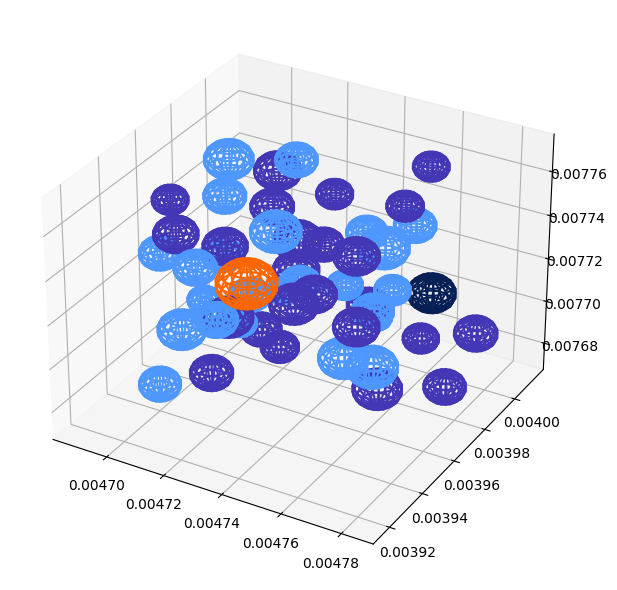

(<module 'matplotlib.pyplot' from '/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <Axes3DSubplot:>)

In [7]:
from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)

### Plotting connection probability between SPNs

__Note that for small networks the connectivity can only be plotted for shorter distances.__

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Loading 50 neurons with 1795 synapses and 0 gap junctions
Number of neurons: 50
Synapse row 0 - 0.0 % time: 0.0009542499974486418 seconds
Created connection matrix 0.003089625999564305 seconds
Created gap junction connection matrix 5.929199687670916e-05 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 1795, at 0
Created distance histogram (optimised) in 0.0026860839971050154 seconds
Saving cache to networks/striatum_example/network-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 24/24
Counting connections
Requested: 10000000.0 calculated [576.]
P(d<5e-05) = 0.07166123778501629
P(d<0.0001) = 0.07291666666666667


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


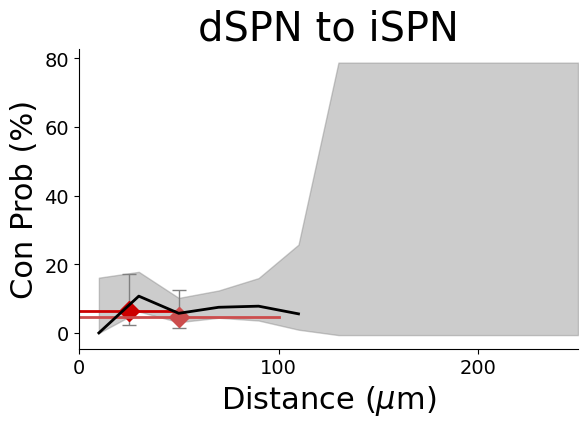

Wrote networks/striatum_example/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 24/24
Counting connections
Requested: 10000000.0 calculated [552.]
P(d<5e-05) = 0.25796178343949044
P(d<0.0001) = 0.2246376811594203


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


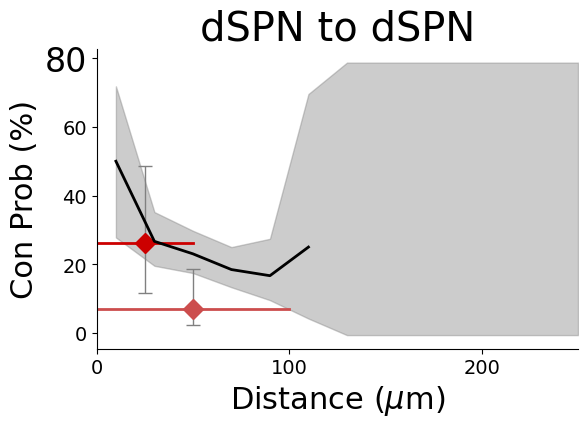

Wrote networks/striatum_example/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-3D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 24/24
Counting connections
Requested: 10000000.0 calculated [576.]
P(d<5e-05) = 0.26058631921824105
P(d<0.0001) = 0.234375


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


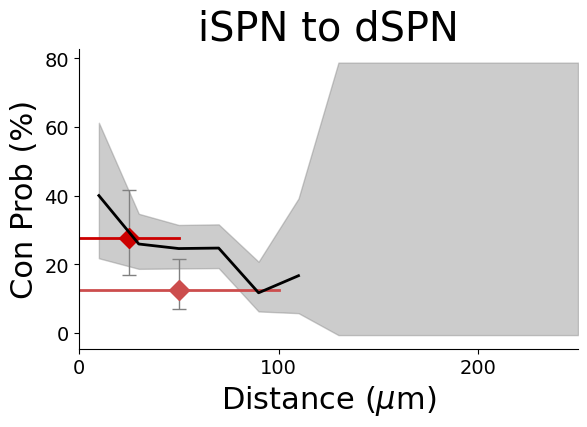

Wrote networks/striatum_example/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-3D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 24/24
Counting connections
Requested: 10000000.0 calculated [552.]
P(d<5e-05) = 0.388
P(d<0.0001) = 0.3423913043478261


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1380: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


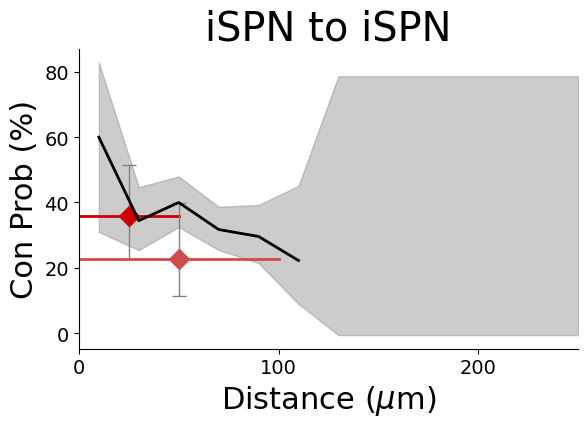

Wrote networks/striatum_example/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.pdf


({5e-05: 0.388, 0.0001: 0.3423913043478261},
 'networks/striatum_example/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.pdf')

In [8]:
from snudda.analyse.analyse import SnuddaAnalyse

network_file = os.path.join(network_path, "network-synapses.hdf5")
nas = SnuddaAnalyse(network_file, volume_type="cube")

nas.plot_connection_probability("dSPN", "iSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(3, 47), (3, 66)])
nas.plot_connection_probability("dSPN", "dSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(5, 19), (3, 43)])
nas.plot_connection_probability("iSPN", "dSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(13, 47), (10, 80)])
nas.plot_connection_probability("iSPN", "iSPN",
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data_detailed=[(14, 39), (7, 31)])

## Simulating

To generate input and simulate this network in NEURON please see ```striatum_example_simulate.ipynb```.

**Important** you need to shut down the kernel in this notebook before running the next notebook, otherwise the hdf5 file will complain that it is already locked.
